## WHATIF DATA PREPARATION

This notebook is meant to take the RSE experiment results on battery module and enhance them with soh artificial measurements in order to simulate a slow drift signal(GROUND for the test)

In [1]:
import pandas as pd
import numpy as np
from src.online_learning.utils import utils
import os

# custom functions

In [2]:
def updateDf(df, listsToAdd, col ):
    tmp = []
    soh = [0.6, 0.7, 0.8, 0.9]
    for i in range(len(listsToAdd)):
        df_new = df.copy()
        df_new[col] = listsToAdd[i]
        df_new['Soh'] = soh[i]
        tmp.append(df_new)
    
    reversed_list_of_dfs = tmp[::-1]
    stacked_df = pd.concat([df] + reversed_list_of_dfs, axis=0).reset_index(drop=True) 
    
    return stacked_df

In [3]:
def enhanceParam(param_array, func):
    xp = np.array([0.6,1])
    x = np.array([0.7,0.8,0.9])
    lists = []
    
    for i in range(len(x)+2):
        lists.append(list)    
    
    lists[0] = func(param_array).tolist()
    lists[4] = param_array.tolist()
    
    tmp1 = []
    tmp2 = []
    tmp3 = []
    for elem in param_array:
        fp = np.array([func(elem),elem])
        y = np.interp(x,xp,fp)
        tmp1.append(y[0])
        tmp2.append(y[1])
        tmp3.append(y[2])    
    
    lists[1] = tmp1
    lists[2] = tmp2
    lists[3] = tmp3
       
    return lists   

In [4]:
halve = lambda x: x/2
double = lambda x: x*2

In [5]:
current_path = os.getcwd()
print("Current working directory:", current_path)

Current working directory: /mnt/c/Users/Nicola_Petkovic/Documents/dt-rse-davide/ErNESTO-DT/notebooks/online_learning/preprocessing


# Data Preparation

Currently working on 1exp experiment

In [6]:
relative_path_ground = os.path.join('..', '..','..', 'data', 'initialization', 'DT_CU1_parameters_1_exp.xlsx')
path_ground = utils.get_absolute_path(relative_path_ground)  
all_sheets = pd.read_excel(path_ground, sheet_name=None)

print(all_sheets.keys())

dict_keys(['T = 25', 'T = 10', 'T = 40'])


In [7]:
all_sheets['T = 25'].head(60)

,filename,data,start interval,end interval,Soc,tau_guess,num value extrap,tau_opt,R_0,R_1,C_1,OCV,R squared
0,20240514_20240515_concat_CU1_25C_3_Ciclatore.txt,NaT,Not present - param from extrapolation,Not present - param from extrapolation,100,1655.86661,7,Not present - param from extrapolation,0.009326,0.010543,10440.718571,28.455000,Not present - param from extrapolation
1,20240514_20240515_concat_CU1_25C_3_Ciclatore.txt,2024-05-14,12:21:53,14:21:53,90,1655.86661,7,89.358556,0.009238,0.009238,9672.823521,28.216000,0.329858
2,20240514_20240515_concat_CU1_25C_3_Ciclatore.txt,2024-05-14,14:33:55,16:33:55,80,1655.86661,7,132.019013,0.010000,0.013520,9764.425137,27.544000,0.261261
3,20240514_20240515_concat_CU1_25C_3_Ciclatore.txt,2024-05-14,16:45:57,18:45:57,70,1655.86661,7,269.182751,0.010635,0.016826,15997.602801,26.939000,0.591878
4,20240514_20240515_concat_CU1_25C_3_Ciclatore.txt,2024-05-14,18:57:59,20:57:59,60,1655.86661,7,152.552665,0.010918,0.011429,13348.358196,26.254000,0.192015
5,20240514_20240515_concat_CU1_25C_3_Ciclatore.txt,2024-05-14,21:10:00,23:10:00,50,1655.86661,7,120.764783,0.011184,0.011437,10559.437530,25.867000,0.602022
6,20240514_20240515_concat_CU1_25C_3_Ciclatore.txt,2024-05-14,23:22:02,01:22:02,40,1655.86661,7,169.082393,0.011531,0.014388,11751.825878,25.625000,0.632446
7,20240514_20240515_concat_CU1_25C_3_Ciclatore.txt,2024-05-15,01:34:03,03:34:03,30,1655.86661,7,245.053612,0.011164,0.017202,14245.638708,25.409000,0.608851
8,20240514_20240515_concat_CU1_25C_3_Ciclatore.txt,2024-05-15,03:46:04,05:46:04,20,1655.86661,7,172.569723,0.011864,0.015062,11457.565813,25.057000,0.352802
9,20240514_20240515_concat_CU1_25C_3_Ciclatore.txt,2024-05-15,05:58:06,07:58:06,10,1655.86661,7,187.718761,0.012163,0.016604,11305.348099,24.654000,-0.069515


In [8]:
all_sheets['T = 25'].describe()

,Soc,tau_guess,num value extrap,R_0,R_1,C_1,OCV
count,55.000000,55.00000,55.0,55.000000,55.000000,55.000000,55.000000
mean,50.000000,1655.86661,7.0,0.011520,0.015499,11965.948149,26.224236
std,31.914237,0.00000,0.0,0.002412,0.006471,3143.296922,1.375532
min,0.000000,1655.86661,7.0,0.009210,0.009238,4919.388300,23.970000
25%,20.000000,1655.86661,7.0,0.010363,0.011560,10500.078051,25.142500
50%,50.000000,1655.86661,7.0,0.010981,0.013876,11751.825878,25.868000
75%,80.000000,1655.86661,7.0,0.011748,0.016568,13995.291319,27.550000
max,100.000000,1655.86661,7.0,0.022375,0.041071,19489.447086,28.504571


<Axes: >

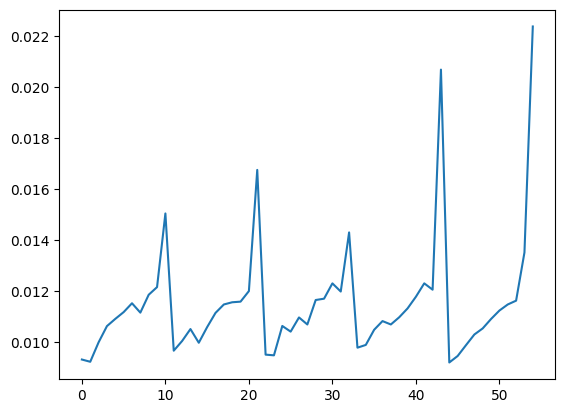

In [9]:
all_sheets['T = 25']['R_0'].plot()

The graph shows that the same experiment is repeated multiple times, since it is relevant for the whatif simulation to have only one lookup, the average is performed.
From the describe and head table can be seen that the experiments are repeated for 11 value of soc, hence the dataset is grouped by soc,i.e. 5 groups 

In [10]:
R_0 = {}
R_1 = {}
C_1 = {}
for key,elem in all_sheets.items():
    R_0[key] = elem.groupby('Soc')['R_0'].mean()
    R_0[key] = R_0[key].reset_index()
    R_1[key] = elem.groupby('Soc')['R_1'].mean()
    R_1[key] = R_1[key].reset_index()
    C_1[key] = elem.groupby('Soc')['C_1'].mean()
    C_1[key] = C_1[key].reset_index()

After this at a given Soc will correspond the average value among the five lookup tables

In [11]:
R_0.keys()

dict_keys(['T = 25', 'T = 10', 'T = 40'])

Just check the results

In [12]:
R_0['T = 10'].head()

,Soc,R_0
0,0,0.029989
1,10,0.030855
2,20,0.022031
3,30,0.020390
4,40,0.019156


In [13]:
for key,elem in R_0.items():
    elem['Soh'] = 1

In [14]:
R_0['T = 25']['Temp'] = 25
R_0['T = 10']['Temp'] = 10
R_0['T = 40']['Temp'] = 40

In [15]:
R_0['T = 10'].head()

,Soc,R_0,Soh,Temp
0,0,0.029989,1,10
1,10,0.030855,1,10
2,20,0.022031,1,10
3,30,0.020390,1,10
4,40,0.019156,1,10


In [16]:
for key,elem in R_0.items():
    values = elem['R_0'].values
    values_enhanced = enhanceParam(values,double)
    tmp = updateDf(df=elem, listsToAdd=values_enhanced[0:3+1] ,col='R_0')
    R_0[key] = tmp

In [17]:
R_0['T = 10'].describe()

,Soc,R_0,Soh,Temp
count,55.000000,55.000000,55.000000,55.0
mean,50.000000,0.030465,0.800000,10.0
std,31.914237,0.010810,0.142725,0.0
min,0.000000,0.014912,0.600000,10.0
25%,20.000000,0.022284,0.700000,10.0
50%,50.000000,0.028982,0.800000,10.0
75%,80.000000,0.035601,0.900000,10.0
max,100.000000,0.061709,1.000000,10.0


In [18]:
df_stacked_R0 = pd.concat(R_0)

In [19]:
df_stacked_R0.describe()

,Soc,R_0,Soh,Temp
count,165.000000,165.000000,165.000000,165.000000
mean,50.000000,0.019971,0.800000,25.000000
std,31.719041,0.010515,0.141852,12.284732
min,0.000000,0.007555,0.600000,10.000000
25%,20.000000,0.012349,0.700000,10.000000
50%,50.000000,0.016769,0.800000,25.000000
75%,80.000000,0.023945,0.900000,40.000000
max,100.000000,0.061709,1.000000,40.000000


Repeated procedure for R1 and C1

In [20]:
R_1['T = 25']['Temp'] = 25
R_1['T = 10']['Temp'] = 10
R_1['T = 40']['Temp'] = 40

for key,elem in R_1.items():
    elem['Soh'] = 1
    
for key,elem in R_1.items():
    values = elem['R_1'].values
    values_enhanced = enhanceParam(values,double)
    tmp = updateDf(df=elem, listsToAdd=values_enhanced[0:3+1] ,col='R_1')
    R_1[key] = tmp 
df_stacked_R1 = pd.concat(R_1)    

In [21]:
C_1['T = 25']['Temp'] = 25
C_1['T = 10']['Temp'] = 10
C_1['T = 40']['Temp'] = 40

for key,elem in C_1.items():
    elem['Soh'] = 1
    
for key,elem in C_1.items():
    values = elem['C_1'].values
    values_enhanced = enhanceParam(values,double)
    tmp = updateDf(df=elem, listsToAdd=values_enhanced[0:3+1] ,col='C_1')
    C_1[key] = tmp  
df_stacked_C1 = pd.concat(C_1)    

In [22]:
df_stacked_C1.head()

Soc           C_1  Temp  Soh
T = 25 0    0   5811.382741    25  1.0
       1   10  11404.450799    25  1.0
       2   20  12600.929525    25  1.0
       3   30  14661.237120    25  1.0
       4   40  12066.767912    25  1.0

<Axes: >

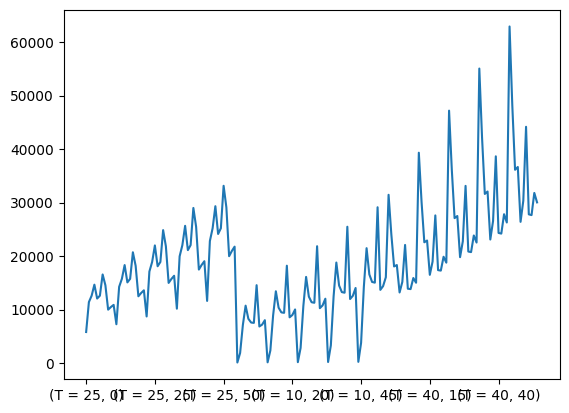

In [23]:
df_stacked_C1['C_1'].plot()

Soh
0.6    Axes(0.125,0.11;0.775x0.77)
0.7    Axes(0.125,0.11;0.775x0.77)
0.8    Axes(0.125,0.11;0.775x0.77)
0.9    Axes(0.125,0.11;0.775x0.77)
1.0    Axes(0.125,0.11;0.775x0.77)
dtype: object

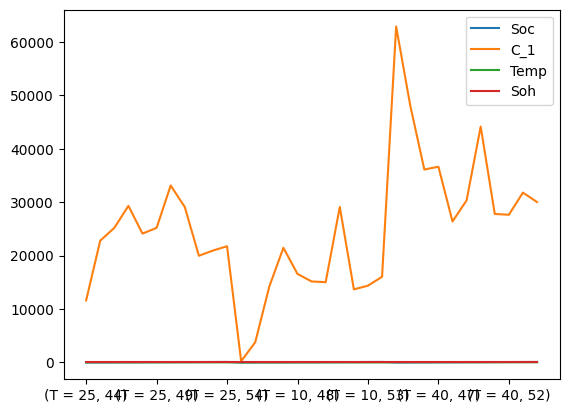

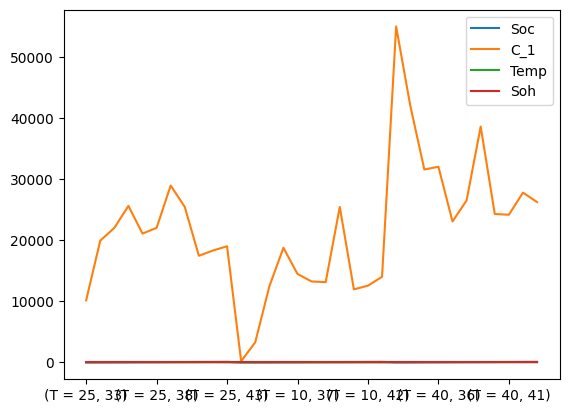

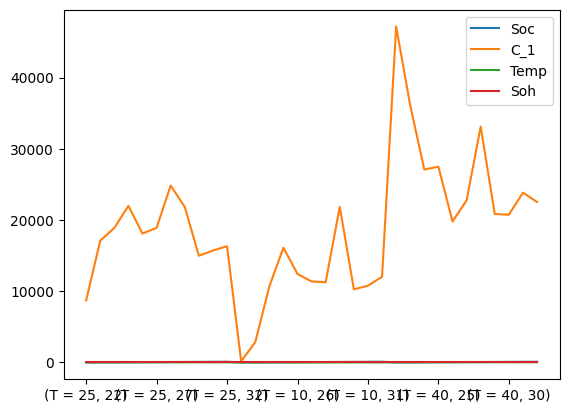

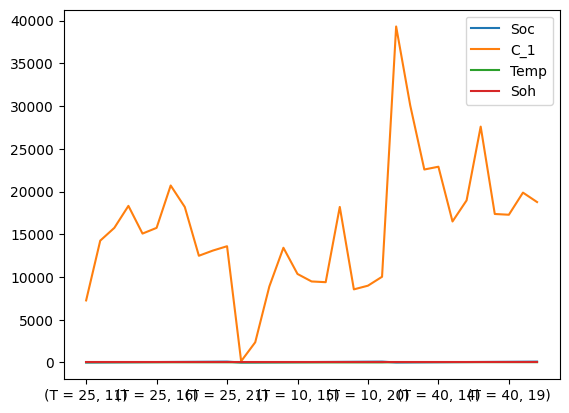

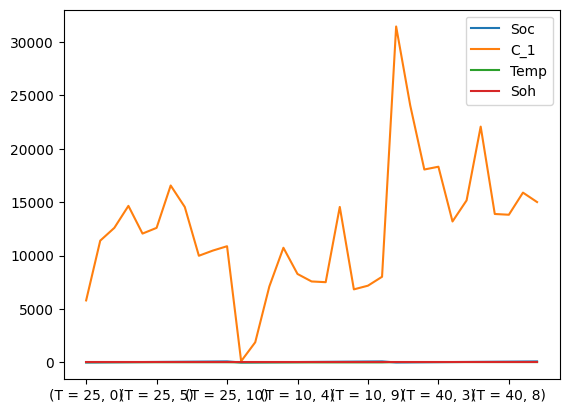

In [24]:
df_stacked_C1.groupby(['Soh']).plot()

In [25]:
df_stacked_C1.to_csv('c1_module_enhanced_table.csv', index=False)
df_stacked_R1.to_csv('r1_module_enhanced_table.csv', index=False)
df_stacked_R0.to_csv('r0_module_enhanced_table.csv', index=False)